In [132]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from textwrap import wrap
import folium
import plotly.graph_objects as go


In [2]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list

In [3]:
region1_df = pd.read_csv('Data/eo1.csv')
region2_df = pd.read_csv('Data/eo2.csv')
region3_df = pd.read_csv('Data/eo3.csv')

In [6]:
all_regions_df = pd.concat([region1_df,region2_df,region3_df])

In [13]:
all_regions_df.shape

(1711634, 28)

In [14]:
all_regions_df = all_regions_df[all_regions_df["DEDUCTIBILITY"] == 1]
all_regions_df.shape

(1418907, 28)

In [15]:
# all_regions_df = all_regions_df.drop(\
#     columns=['FILING_REQ_CD',"PF_FILING_REQ_CD","STATUS","NTEE_CD"])

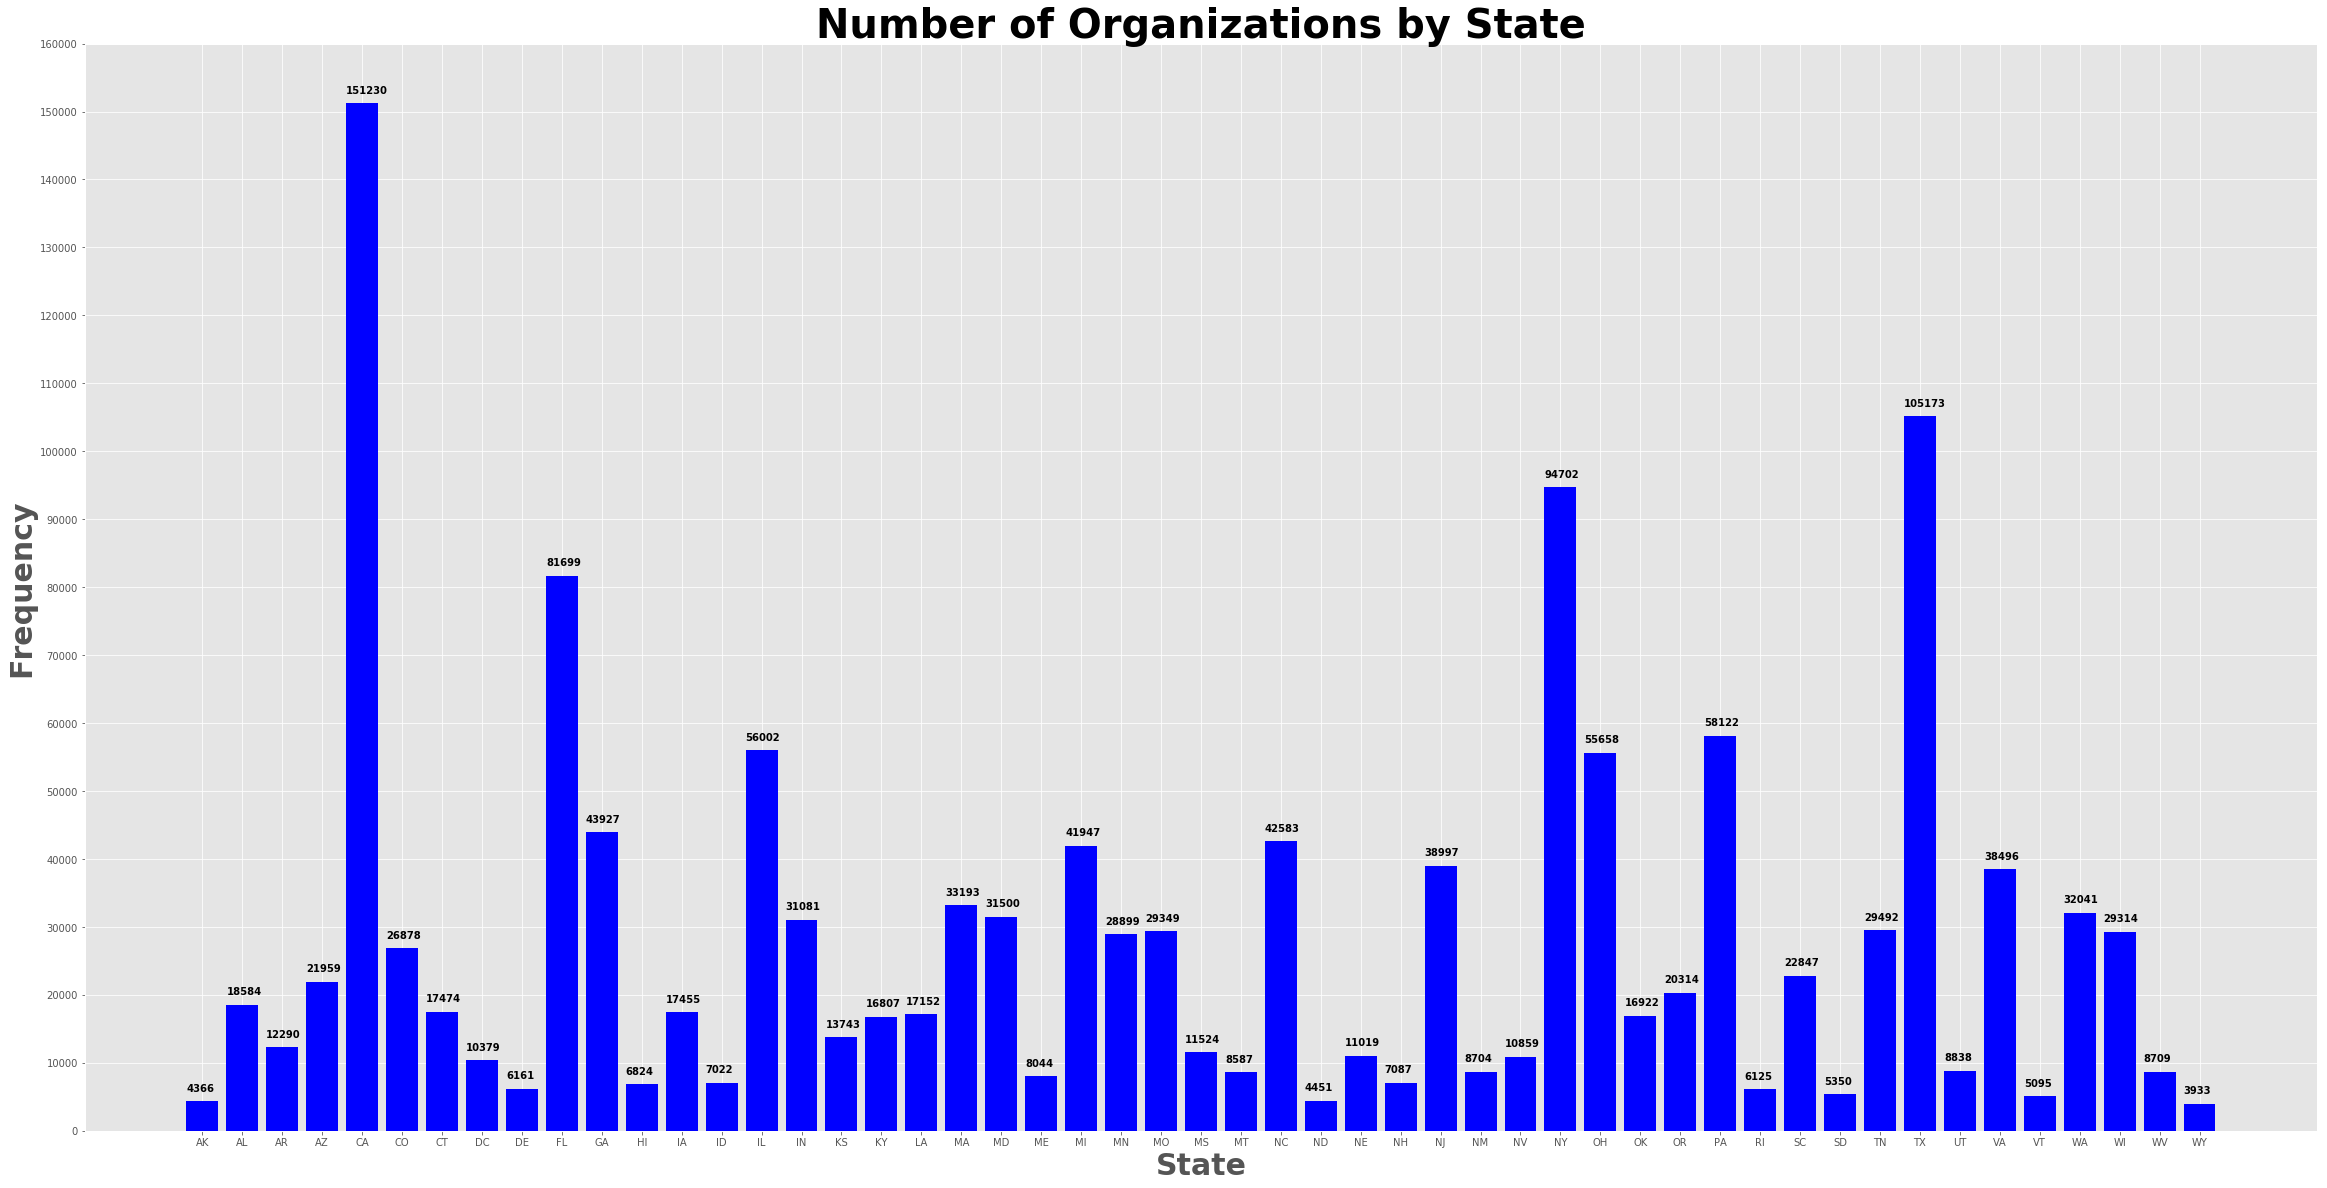

In [30]:
# State Count Bar Graph
state_df_count = all_regions_df.groupby("STATE").size()
states = list(state_df_count.index.values)
freq = freq_array(state_df_count)

fig,ax = plt.subplots(figsize = (40,20))
ax.bar(states,freq, color = "b");
ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000));
ax.set_title("Number of Organizations by State", weight = "bold", fontsize = 40);
ax.set_xlabel("State", fontsize=30, weight = "bold");
ax.set_ylabel("Frequency", fontsize=30, weight = "bold");

set_labels(state_df_count,ax,.4,1500,c="k");

In [34]:
state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
state_df_count.loc[:10]

,STATE,Frequency
4,CA,151230
43,TX,105173
34,NY,94702
9,FL,81699
38,PA,58122
14,IL,56002
35,OH,55658
10,GA,43927


   STATE  Frequency
4     CA     151230
43    TX     105173
34    NY      94702
9     FL      81699
38    PA      58122
14    IL      56002
35    OH      55658
10    GA      43927


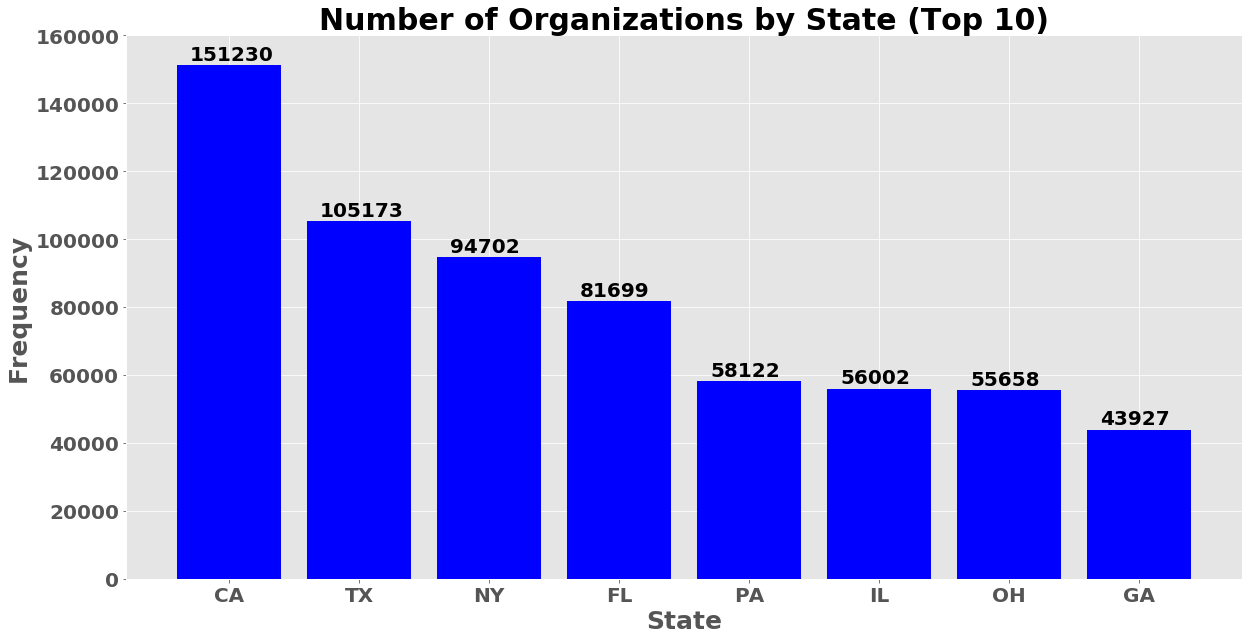

In [69]:
# State Count Bar Graph (Top 10)
state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
state_df_count = state_df_count.loc[:10]
print(state_df_count)
states = state_df_count['STATE']
freq = freq_array(state_df_count['Frequency'])
fig,ax = plt.subplots(figsize = (20,10))
ax.bar(states,freq, color = "b");

ax.set_yticks(np.arange(0,np.max(freq)+20000,20000));
ax.set_title("Number of Organizations by State (Top 10)", weight = "bold", fontsize = 30);
ax.set_xlabel("State", fontsize=25, weight = "bold");
ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
ax.set_yticklabels(np.arange(0,np.max(freq)+20000,20000), weight="bold", fontsize =20) ;
ax.set_xticklabels(states, weight="bold",fontsize=20);

set_labels(freq,ax,.3,1500,c="k",fsize=20);

plt.savefig("Num_Orgs_Top_10_States")

In [157]:
# my_USA_map = "Data/us-states.json"
# map = folium.Map(location=[40, -100], zoom_start=4)

In [158]:
# state_df = all_regions_df.groupby("STATE").size().reset_index(name="Count")

In [156]:
# map.choropleth(geo_data=my_USA_map, data=state_df,
#              columns=['STATE', 'Count'],
#              key_on='feature.id',
#              fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
#              legend_name='Charity Count', hover_text=state_df["STATE"])
# map

In [159]:
fig = go.Figure(data=go.Choropleth(
    locations = state_df['STATE'],
    z=state_df['Count'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=state_df['STATE'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Number of Charities"
))

fig.update_layout(
    title_text='Number of US Charitable Organizations by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [166]:
all_regions_df.sort_values(by="INCOME_AMT",ascending=False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ACTIVITY,ORGANIZATION,TAX_PERIOD,ASSET_CD,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,SORT_NAME
736363,911663695,BILL & MELINDA GATES FOUNDATION TRUST,% WILLIAM H GATES III,PO BOX 23350,SEATTLE,WA,98102-0650,0,3,3,...,602000000,2,201712.0,9,9,12,5.088928e+10,8.535090e+10,NaN,NaN
524636,590735717,HOWARD HUGHES MEDICAL INSTITUTE,% NITIN V KOTAK,4000 JONES BRIDGE RD,CHEVY CHASE,MD,20815-6720,0,3,3,...,162161000,1,201808.0,9,9,8,2.381626e+10,7.945706e+10,1.527324e+09,STEPHEN JASKO
764461,941340523,KAISER FOUNDATION HEALTH PLAN INC,% CHIEF ACCOUNTING OFFICER,1 KAISER PLAZA SUITE 15L,OAKLAND,CA,94612-3610,0,3,3,...,164000000,1,201712.0,9,9,12,2.111780e+10,6.871403e+10,5.398362e+10,NaN
221864,450233470,BANNER HEALTH,% DAVID BIXBY,2901 N CENTRAL AVE STE 160,PHOENIX,AZ,85012-2702,0,3,3,...,150153000,1,201712.0,9,9,12,1.121941e+10,4.234284e+10,6.471227e+09,NaN
14345,42103594,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,% BASIL A STEWART,77 MASSACHUSETTS AVE NE 49-4097,CAMBRIDGE,MA,02139-4301,0,3,3,...,30000000,1,201806.0,9,9,6,2.586194e+10,3.714042e+10,4.443525e+09,NaN


In [181]:
total_assets = all_regions_df.groupby("STATE")["ASSET_AMT"].agg("sum").reset_index(name="Sum")
total_assets.head()

,STATE,Sum
0,AK,9.408264e+09
1,AL,2.379803e+10
2,AR,2.770206e+10
3,AZ,4.757533e+10
4,CA,6.030855e+11


In [172]:
fig = go.Figure(data=go.Choropleth(
    locations = total_assets['STATE'],
    z=total_assets['Sum'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=total_assets['STATE'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Sum of Assets"
))

fig.update_layout(
    title_text='Sum of US Charitable Organizations Assets by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [200]:
def heatmap_USA_by_state(dataFrame,state_col_name,zoom_col_name,title,bar_title,action="sum"):
    temp_df = dataFrame.groupby(state_col_name)[zoom_col_name].agg(action).reset_index(name=action)
    
    fig = go.Figure(data=go.Choropleth(
    locations = temp_df[state_col_name],
    z=temp_df[action],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,

    text = temp_df[state_col_name],

    marker_line_color='black', # line markers between states
    colorbar_title=bar_title
    ))

    fig.update_layout(
        title_text=title+'<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=go.layout.geo.Projection(type = 'albers usa'),
            showlakes=True, # lakes
            lakecolor='rgb(255, 255, 255)'),
    )

    fig.show()


In [219]:
#Consider Adding Charity Names in Hover
heatmap_USA_by_state(
    all_regions_df,'STATE',"INCOME_AMT","Max Income Charities By State","Max Income","max"
)

In [204]:
heatmap_USA_by_state(
    all_regions_df,'STATE',"INCOME_AMT","Total Income Charities By State","Total Income","sum"
)

In [209]:
all_regions_df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ACTIVITY,ORGANIZATION,TAX_PERIOD,ASSET_CD,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,1000000,5,NaN,0,0,12,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,1000000,1,NaN,0,0,12,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,1,NaN,0,0,12,NaN,NaN,NaN,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,1,NaN,0,0,12,NaN,NaN,NaN,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,1,NaN,0,0,12,NaN,NaN,NaN,NaN
